In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../../')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)



e:\User\PC\ads_enefit_ueh\ads_enfit


In [2]:
from libs.common import *
from config.config import *
from models.models import VGG16, LSTM

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


e:/User/PC/ads_enefit_ueh/ads_enfit


In [3]:
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/exp"
os.makedirs(save_dir, exist_ok=True)

In [4]:
plt.style.use(f'{style_dir}/style.mplstyle')
shap.initjs()

In [5]:
# wandb.init(project="enefit_prediction_consumer")


In [6]:
X_train=pd.read_csv(f'{save_dir}/X_train.csv', index_col=None)
X_valid=pd.read_csv(f'{save_dir}/X_valid.csv', index_col=None)
y_train=pd.read_csv(f'{save_dir}/y_train.csv', index_col=None)
y_valid=pd.read_csv(f'{save_dir}/y_valid.csv', index_col=None)
X_test=pd.read_csv(f'{save_dir}/X_test.csv', index_col=None)
y_test=pd.read_csv(f'{save_dir}/y_test.csv', index_col=None)


In [7]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_valid.drop(columns=['Unnamed: 0'], inplace=True)
y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_valid.drop(columns=['Unnamed: 0'], inplace=True)
X_valid.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)
y_test.drop(columns=['Unnamed: 0'], inplace=True)
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(1086844, 102) (1086844, 1) (535312, 102) (535312, 1)


In [8]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
lstm_model = LSTM(input_shape=(X_train.shape[1],1))
lr=0.0001
lstm_model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['mae', r2])
lstm_model.summary()

In [10]:
early_stopping = EarlyStopping(monitor='val_loss',
                                mode='min',
    min_delta=0.00005,
    patience=15,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    factor=0.5,
    patience=6,
    min_lr=0.000001,
    verbose=1,
)
checkpoint_callback = ModelCheckpoint(
    filepath='cnn.hdf5', 
    monitor='val_loss', 
    mode='min',
    save_best_only=True, 
    verbose=1,  
    save_format="tf"
)

In [11]:
lstm_model.fit(X_train,y_train,
          validation_data=(X_valid,y_valid),
          batch_size=64,epochs= 10000, callbacks=[early_stopping,lr_scheduler,checkpoint_callback])

Epoch 1/10000
16982/16982 [==============================] - ETA: 0s - loss: 0.2787 - mae: 0.2787 - r2: -0.7477
Epoch 1: val_loss improved from inf to 0.10987, saving model to cnn.hdf5
16982/16982 [==============================] - 359s 21ms/step - loss: 0.2787 - mae: 0.2787 - r2: -0.7477 - val_loss: 0.1099 - val_mae: 0.1099 - val_r2: 0.8504 - lr: 1.0000e-04
Epoch 2/10000
16980/16982 [============================>.] - ETA: 0s - loss: 0.1680 - mae: 0.1680 - r2: 0.1393
Epoch 2: val_loss did not improve from 0.10987
16982/16982 [==============================] - 343s 20ms/step - loss: 0.1680 - mae: 0.1680 - r2: 0.1393 - val_loss: 0.1138 - val_mae: 0.1138 - val_r2: 0.8624 - lr: 1.0000e-04
Epoch 3/10000
16980/16982 [============================>.] - ETA: 0s - loss: 0.1632 - mae: 0.1632 - r2: 0.2212
Epoch 3: val_loss did not improve from 0.10987
16982/16982 [==============================] - 351s 21ms/step - loss: 0.1632 - mae: 0.1632 - r2: 0.2213 - val_loss: 0.1121 - val_mae: 0.1121 - val_r

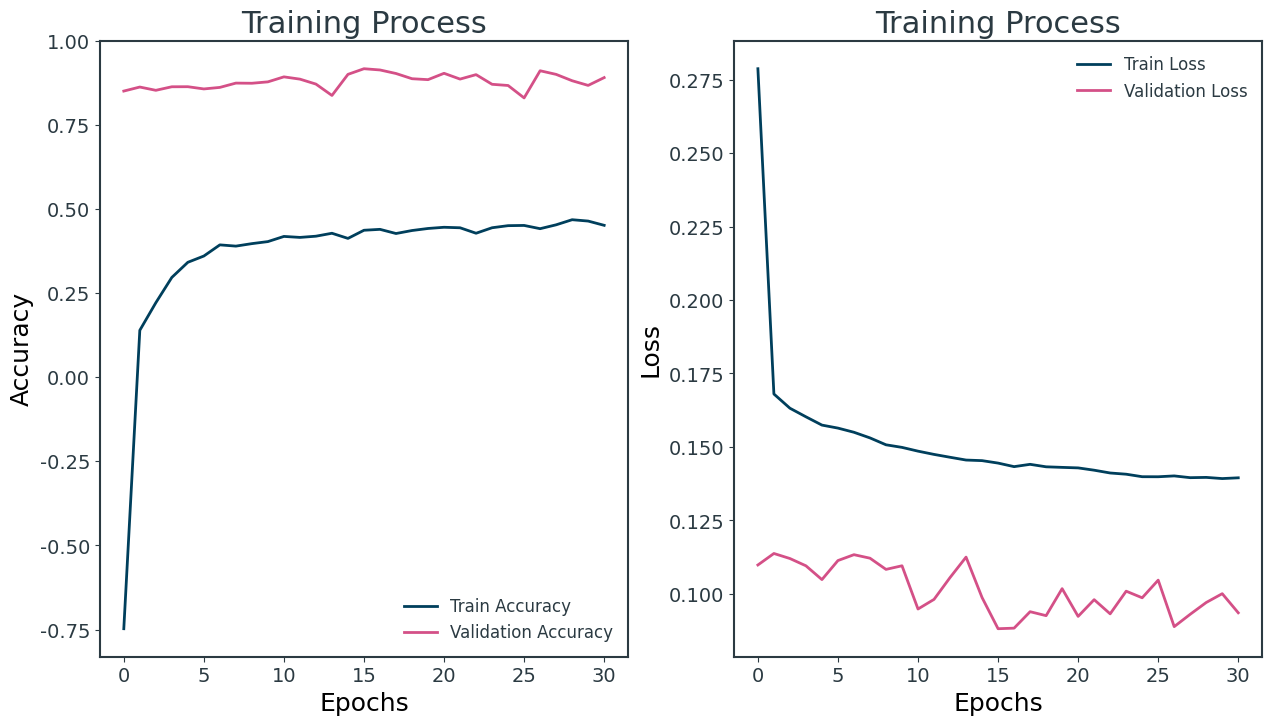

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

history = model.history.history

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].plot(pd.DataFrame(history['r2']), label='Train Accuracy')
axes[0].plot(pd.DataFrame(history['val_r2']), label='Validation Accuracy')
axes[0].set_title('Training Process')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(pd.DataFrame(history['mae']), label='Train Loss')
axes[1].plot(pd.DataFrame(history['val_mae']), label='Validation Loss')
axes[1].set_title('Training Process')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.show()


In [13]:
model.history.history['r2']

[-0.7476778626441956,
 0.1393207311630249,
 0.22126486897468567,
 0.29651713371276855,
 0.3414655923843384,
 0.36012178659439087,
 0.3932570219039917,
 0.3895551264286041,
 0.3969472646713257,
 0.4030096232891083,
 0.418378084897995,
 0.4154355525970459,
 0.4190447926521301,
 0.4277772009372711,
 0.412485808134079,
 0.43670451641082764,
 0.4393905699253082,
 0.4270130395889282,
 0.43591028451919556,
 0.44198983907699585,
 0.4455671012401581,
 0.4440682828426361,
 0.42783287167549133,
 0.4441590905189514,
 0.45035067200660706,
 0.45101770758628845,
 0.4413711428642273,
 0.45287638902664185,
 0.46803054213523865,
 0.4640052616596222,
 0.4513459801673889]

In [14]:
# Truy cập vào lịch sử của mô hình
training_history = model.history.history

# In ra các keys của lịch sử
print(training_history.keys())

# In ra các giá trị của loss và accuracy qua các epochs
print(training_history['loss'])
print(training_history['val_loss'])

dict_keys(['loss', 'mae', 'r2', 'val_loss', 'val_mae', 'val_r2', 'lr'])
[0.27867409586906433, 0.16802802681922913, 0.16319255530834198, 0.1602688580751419, 0.15744855999946594, 0.15642601251602173, 0.1550084799528122, 0.1530928909778595, 0.1507459282875061, 0.14986762404441833, 0.14858509600162506, 0.14747820794582367, 0.146505668759346, 0.145559623837471, 0.14535941183567047, 0.14452539384365082, 0.14331842958927155, 0.14410321414470673, 0.14326080679893494, 0.14306819438934326, 0.14288999140262604, 0.14210566878318787, 0.14115774631500244, 0.14074353873729706, 0.13989345729351044, 0.1398756057024002, 0.1401626467704773, 0.13956405222415924, 0.13965880870819092, 0.13926059007644653, 0.1395166516304016]
[0.10986501723527908, 0.11377602815628052, 0.11206255853176117, 0.10958410054445267, 0.10489418357610703, 0.11137233674526215, 0.1133689284324646, 0.11217392235994339, 0.10836607962846756, 0.10959485918283463, 0.09488733857870102, 0.09816332161426544, 0.10558769851922989, 0.112541772425

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error

# Dự đoán trên tập validation
y_pred = lstm_model.predict(X_test)

# Tính toán R2 Score
r2 = r2_score(y_test, y_pred)

# Tính toán MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")


16729/16729 [==============================] - 51s 3ms/step
R2 Score: 0.921838309184248
MAE: 0.08818280790543503
